ver: 20210922_1743

In [1]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n sequence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Returns a flipped sequence.
seq_flip = lambda seq, noff: (seq[::-1], seq.size - noff - 1)

# Returns a shifted sequence.
seq_shift = lambda seq, noff, m: (seq, noff - m)

# Align 2 sequences
def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))
    noff1 = -n_min
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))
    noff2 = -n_min
    return (seq1, noff1, seq2, noff2)

# 1.1.3 序列的卷积和

$$ y(n) = x(n)*h(n) = \sum_{m=-\infty}^{\infty} x(m)h(n-m) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $h(n)=R_3(n)$, 求 $y(n) = x(n)*h(n)$

解：用对位相乘相加法，可得
$$
\begin{array}{r}
     x(n): &    &     &    1 & \underline{0.5}   & 0.25  & 0.125 \\
     h(n): &    &     &      &   \underline{1}   &   1   &     1 \\
    \hline
           &    &     &    1 & 0.5   & 0.25  & 0.125 \\
           &    &   1 &  0.5 & 0.25  & 0.125 \\
           &  1 & 0.5 & 0.25 & 0.125 \\
   \hline
     y(n): & 1  & \underline{1.5} & 1.75 & 0.875 & 0.375 & 0.125
\end{array}
$$

x = [1.    0.5   0.25  0.125] , noff_x = 1
h = [1 1 1] , noff_h = 0


Text(0.5, 0, 'n')

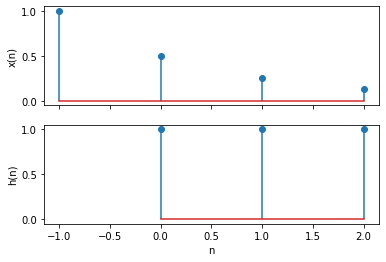

In [2]:
# Define the sequences.

x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
h = np.array([1, 1, 1]); noff_h = 0

print("x =", x, ", noff_x =", noff_x)
print("h =", h, ", noff_h =", noff_h)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(h, noff_h), h)
axs[1].set_ylabel('h(n)')
axs[1].set_xlabel('n')

(1) 翻褶：选哑变量为$m$,作$x(m)$、$h(m)$,将$h(m)$以$m=0$的垂直轴为对称轴翻褶
成$h(-m)$

h_flip = [1 1 1] , noff_h_flip = 2


Text(0.5, 0, 'm')

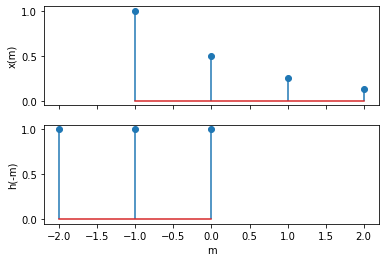

In [3]:
(h_flip, noff_h_flip) = seq_flip(h, noff_h)

print("h_flip =", h_flip, ", noff_h_flip =", noff_h_flip)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip, noff_h_flip), h_flip)
axs[1].set_ylabel('h(-m)')
axs[1].set_xlabel('m')

(2) 移位：将$h(-m)$移位$n$，得$h(n-m)$。$n>0$时，右移$n$位，$n<0$时，左移$|n|$位。

h_flip_shift = [1 1 1] , noff_h_flip_shift = 3


Text(0.5, 0, 'm')

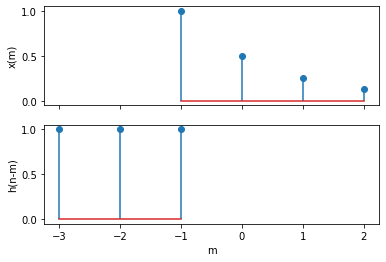

In [4]:
n = -1

(h_flip_shift, noff_h_flip_shift) = seq_shift(h_flip, noff_h_flip, n)

print("h_flip_shift =", h_flip_shift, ", noff_h_flip_shift =", noff_h_flip_shift)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[1].set_xlabel('m')

(3) 相乘：将$h(n-m)$与$x(m)$在相同$m$处的对应值相乘。

Text(0.5, 0, 'm')

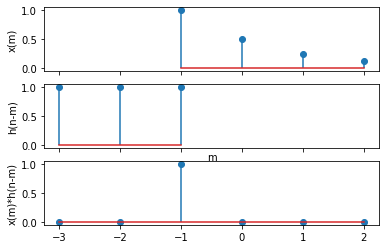

In [5]:
(x1, noff_x1, h1, noff_h1) = seq_align(x, noff_x, h_flip_shift, noff_h_flip_shift)
x_dot_h_flip_shift = x1*h1
noff_x_dot_h_flip_shift = noff_x1

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[2].stem(seq_n(x_dot_h_flip_shift, noff_x_dot_h_flip_shift), x_dot_h_flip_shift)
axs[2].set_ylabel('x(m)*h(n-m)')
axs[1].set_xlabel('m')

(4) 相加：将以上所有$m$处的乘积值叠加，就得到这一个$n$值下的$y(n)$值。

In [6]:
y = sum(x_dot_h_flip_shift)
print(y)

1.0


In [7]:
# Build a general function for computing convolution of two seqences.

# The API of the function:
#
#  seq_conv(seq1, noff1, seq2, noff2)
#     Returns the discrete, linear convolution of two sequences.
#
#     Parameters: 
#         seq1, seq2: array_like
#             The 2 input sequences.
#         noff1, noff： int
#             n's offsets of the 2 input sequences.
#     Returns: (seq, noff)
#         seq: array_like
#             The output sequence.
#         noff: int
#             n's offset of the output sequence.
#
# [To be completed by students.]
# Note:
# - Requires the function and its unit test.
# - Must base on the code above. DO NOT use any built-in convolution functions!